In [111]:
import pandas as pd 

import matplotlib.pyplot as plt

import seaborn as sns

 1>Predict delivery time using sorting time 

In [112]:
data=pd.read_csv('delivery_time.csv')

In [113]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [114]:
data=data.rename({'Delivery Time':'dtime','Sorting Time':'stime'},axis=1 )

In [115]:
data=data.rename({'Delivery Time':'dtime','Sorting Time':'stime'},axis=1 )

In [116]:
(21,2)

(21, 2)

In [117]:
data.isnull().sum()

dtime    0
stime    0
dtype: int64

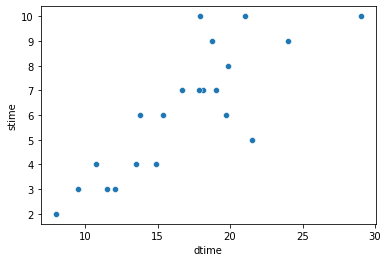

In [118]:
sns.scatterplot(x='dtime',y='stime',data=data)
plt.show()

In [119]:
X = data["stime"].values.reshape(21,1)

In [120]:
X = data["stime"].values.reshape(21,1)

model=smf.ols("delivery_time-sorting_time",data=dataset).fit()

Model Testing

In [121]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
reg=lr.fit(X,y)

In [122]:
lr.predict(X)

array([[10.],
       [ 4.],
       [ 6.],
       [ 9.],
       [10.],
       [ 6.],
       [ 7.],
       [ 3.],
       [10.],
       [ 9.],
       [ 8.],
       [ 4.],
       [ 7.],
       [ 3.],
       [ 3.],
       [ 4.],
       [ 6.],
       [ 7.],
       [ 2.],
       [ 7.],
       [ 5.]])

Accuracy of our model

In [123]:
lr.score(X,y) # to check accuracy # our model is 68% accurate

1.0

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf


In [4]:
# import dataset
data=pd.read_csv('delivery_time.csv')
data


,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


EDA and Data Visualization

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\Users\Pr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

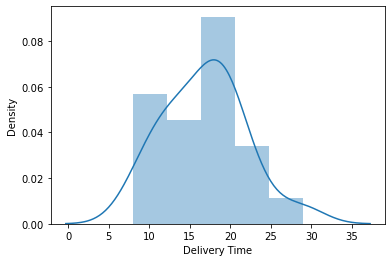

In [7]:
sns.distplot(data['Delivery Time'])

C:\Users\Pr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

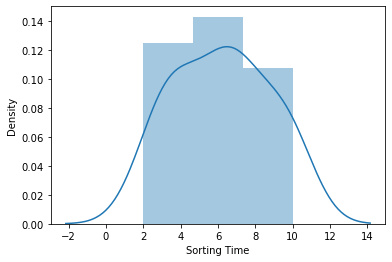

In [8]:
sns.distplot(data['Sorting Time'])

Feature Engineering

In [9]:
# Renaming Columns
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


Correlation Analysis

In [11]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

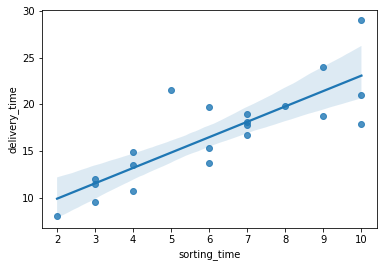

In [12]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])


Model Building

In [14]:
model=smf.ols("delivery_time~sorting_time",data=data).fit()

Model Building

In [15]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [16]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [17]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

Model Predictions

In [18]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [19]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [20]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [21]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

#Q2

2> Build a prediction model for Salary_hike


In [25]:
# impoort libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf


In [26]:
# import data
data=pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


EDA and Data Visualization

In [28]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Users\Pr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

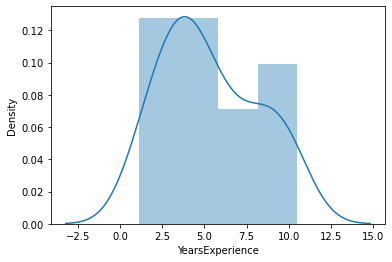

In [29]:
sns.distplot(data['YearsExperience'])

C:\Users\Pr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

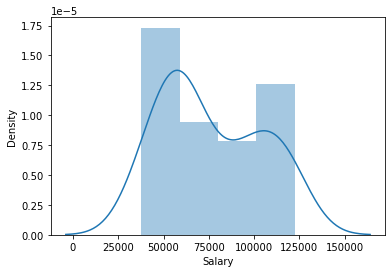

In [30]:
sns.distplot(data['Salary'])

Correlation Analysis

In [31]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

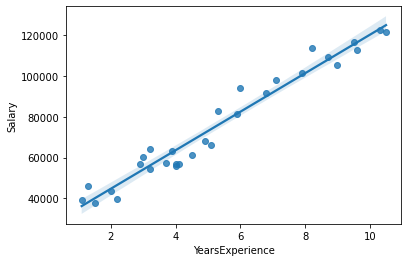

In [32]:

sns.regplot(x=data['YearsExperience'],y=data['Salary'])

Model Building

In [33]:
model=smf.ols("Salary~YearsExperience",data=data).fit()

Model Testing

In [34]:
# Finding Cefficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [35]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [36]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

Model Predictions

In [37]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [38]:
# Automatic Prediction for say 3 & 5 Years Experience 

In [39]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [40]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [41]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64